In [1]:
%matplotlib notebook
from pylab import *
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

In [2]:
x,y,f = np.loadtxt("LatticeSierpinski_18x18.xyz",usecols=(1,2,4),skiprows=2,unpack=True)

In [3]:
r = 1.1
Dic = {}
natoms = int( len(x) )
for n in range(natoms):
    a = sqrt( (x[n]-x)*(x[n]-x) + (y[n]-y)*(y[n]-y) ) < r
    vecinos = [i for i, x in enumerate(a) if x and i!=n]
    Dic[n] = vecinos

In [4]:
H = np.zeros((natoms,natoms))

In [5]:
γ = 1
λ = 4.5
for n in Dic.keys():
    vecinos = Dic[n]
    for v in vecinos:
        f0 = f[n]
        f1 = f[v]
        if f0 == f1:
            fase = γ
        else: 
            fase = λ
        H[n,v] = fase
        H[v,n] = fase

f0 = 0
f1 = 0
fase = 1
for n in Dic.keys():
    vecinos = Dic[n]
    for v in vecinos:
        posx     = x[n]
        posy     = y[n]
        f0       = f[n]
        f1       = f[v] 
        if f0 == f1:
            fase = γ
        else: 
            fase = λ
        
        if ( posx%2==0 and posy%2==0  ):
            if ( x[v] > x[n] ):
                H[(n,v)] = -fase
                H[(v,n)] = -fase
        elif(posx%2==1 and posy%2==1):
            if ( x[v] > x[n] ):
                H[(n,v)] = -fase
                H[(v,n)] = -fase
        else:
            pass

<IPython.core.display.Javascript object>


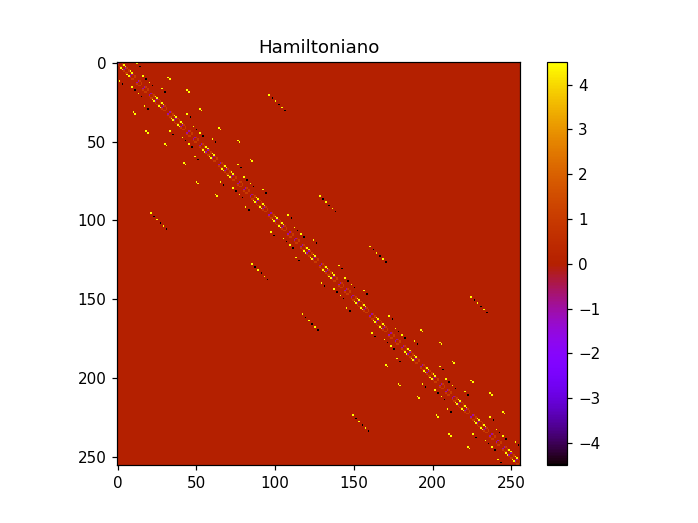

In [6]:
fig, ax = plt.subplots()
cx = ax.imshow(H, cmap = 'gnuplot')
ax.set_title('Hamiltoniano')
fig.colorbar(cx)
fig.savefig('hamiltonian_18x18_a.pdf')

In [9]:
%%time
Ek, U = eigh(H)
Ek = np.real(Ek)

CPU times: user 68.1 ms, sys: 84.5 ms, total: 153 ms
Wall time: 43.9 ms


In [10]:
np.savetxt("Energias_a.txt",Ek,fmt = '%s', comments = '')
np.savetxt("Estados_a.txt",U,fmt = '%s', comments = '')

<IPython.core.display.Javascript object>


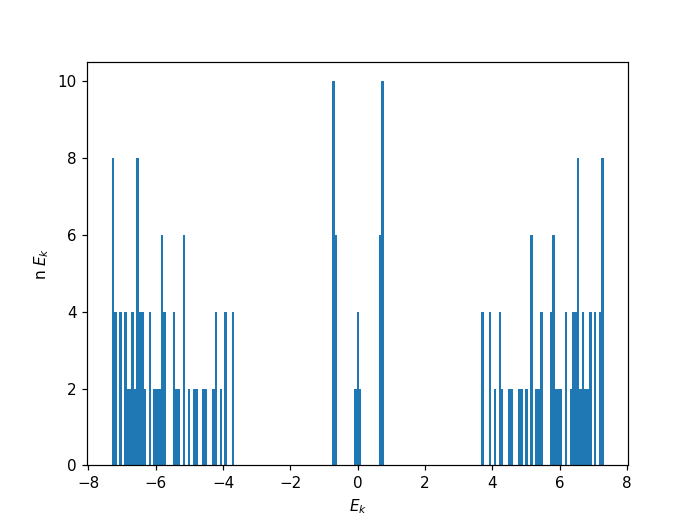

Text(0.5, 0, '$E_k$')

In [11]:
fig, ax = plt.subplots()
ax.hist(np.real(Ek),201)
ax.set_ylabel('n $E_k$')
ax.set_xlabel('$E_k$')

In [20]:
indexsort = argsort(Ek)
Est = [i for i,val in enumerate(Ek) if abs(val) < 6e-3 and abs(val) > 3e-3]
ek = np.mean(Ek[Est])
s = [np.real(U.T[i]*U.T.conjugate()[i]) for i in Est]
S = np.zeros(len(s[0]))
for i in range(len(s)):
    S += s[i] 
S = S/len(s)

In [21]:
Est  = [125, 126, 128, 129]

In [22]:
print(Est)

[125, 126, 128, 129]


In [23]:
Rx = []
Ry = []
for i in np.unique(f):
    find = [j for j,val in enumerate(f) if val == i]
    X = [x[i] for i in find]
    Y = [y[i] for i in find]
    xmax = np.amax(X)
    xmin = np.amin(X)
    ymax = np.amax(Y)
    ymin = np.amin(Y)
    rx = (xmax + xmin)/2
    ry = (ymax + ymin)/2
    Rx.append(rx)
    Ry.append(ry)

<IPython.core.display.Javascript object>


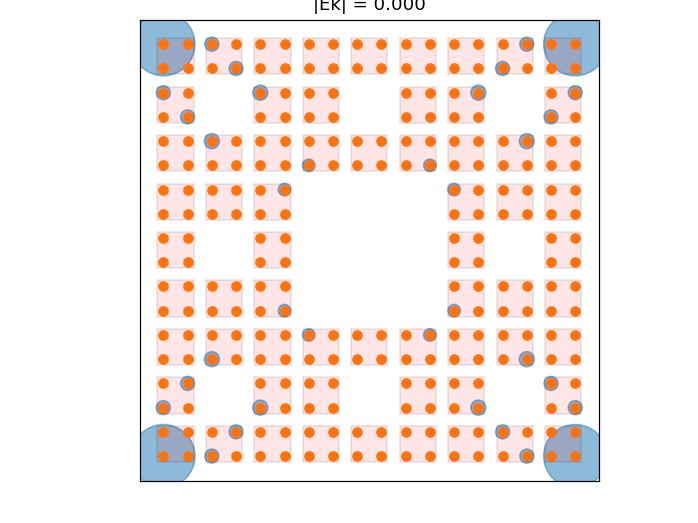

In [24]:
fig, ax = plt.subplots(1)

ax.scatter(x,y,s=S*10000,alpha=0.5)
ax.scatter(x,y)
boxes = []
for i in range(len(Rx)):
    rect = Rectangle((Rx[i] - .75, Ry[i] - .75), 1.5,1.5)
    boxes.append(rect)

pc = PatchCollection(boxes, facecolor='r', alpha=0.1,edgecolor='black')
ax.add_collection(pc)
fig.tight_layout()
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("|Ek| = {0:.3f}".format(abs(ek)))
plt.show()

In [20]:
indexsort = argsort(Ek)

In [25]:
from ipywidgets import *


In [26]:
Ei = np.unique(np.round(Ek,3))
@interact(n=(0,len(Ei) - 1))
def enpsi(n=0):
    Est = [i for i,val in enumerate(np.round(Ek,3)) if val == Ei[n]]
    Esel = Ei[n]
    s = [U.T[i]*U.T[i] for i in Est]
    S = np.zeros(len(s[0]))
    for i in range(len(s)):
        S += s[i] 
    S = S/len(s)
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.0,6.0))
    axes.set_title("Ek = {0:.3f}".format(Esel))
    axes.scatter(x,y,color="red",s=3,zorder=2)
    axes.scatter(x,y,s=S*10000,alpha=0.5)
    
    fig.tight_layout()
    boxes = []
    for i in range(len(Rx)):

        rect = Rectangle((Rx[i] - .75, Ry[i] - .75), 1.5,1.5)
        boxes.append(rect)

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(boxes, facecolor='r', alpha=0.1,
                         edgecolor='black')

    # Add collection to axes
    axes.add_collection(pc)
    plt.show()

    

interactive(children=(IntSlider(value=0, description='n', max=125), Output()), _dom_classes=('widget-interact'…

In [23]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

<IPython.core.display.Javascript object>


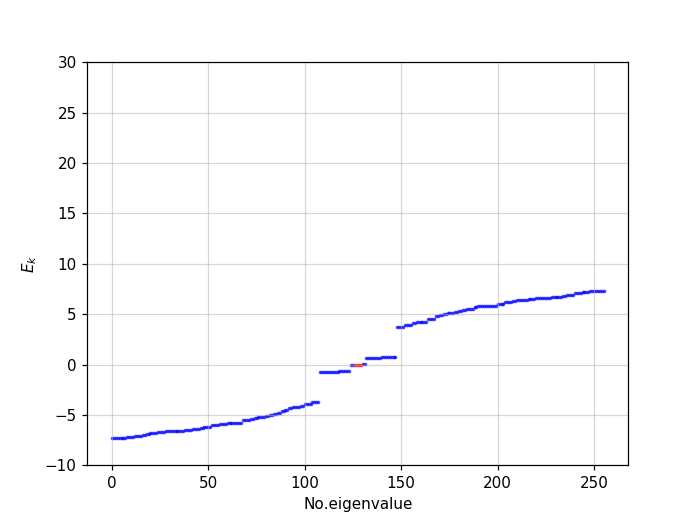

NameError: name 'zoomed_inset_axes' is not defined

In [27]:
fig, ax = plt.subplots()
Ek_nc = [Ek[indexsort][i] for i in range(len(Ek)) if not(Ek[indexsort][i] in Ek[indexsort][126:130])]
rang =[i for i in range(len(indexsort)) if not(i in range(126,130))]
ax.scatter(rang,Ek_nc, c = 'b',s = 2, alpha=0.6)
ax.scatter(range(126,130),Ek[indexsort][126:130], c = 'r', s = 2, alpha = 0.6)
ax.set_xlabel("No.eigenvalue")
ax.set_ylabel("$E_k$")
ax.set_ylim(-10,30)
ax.grid(alpha = 0.5)

axins = zoomed_inset_axes(ax, 6, loc=9) # zoom = 6
Ek_nc = [Ek[indexsort][i] for i in range(len(Ek)) if not(Ek[indexsort][i] in Ek[indexsort][126:130])]
rang =[i for i in range(len(indexsort)) if not(i in range(126,130))]
axins.scatter(rang,Ek_nc, c = 'b', alpha = 0.4)
axins.scatter(range(126,130),Ek[indexsort][126:130], c = 'r', alpha = 0.4)

x1, x2, y1, y2 = 110, 145, -1, 1
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

plt.xticks(visible=False)
plt.yticks(np.arange(-1,1,step=0.5),visible=False)
axins.grid(alpha = 0.2)
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.005", ls = "--")

plt.draw()
plt.show()

fig.savefig('Ekvs#Ek_con_18x18_a.pdf')